In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load data
file_path = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
# file_path = r'C:\Users\pablo\vscode101\Project_Files\GSAF5.xls'
df = pd.read_excel(file_path)

# Quick look at columns and missingness
display(df.info())

# Display the first few rows
# df.info()
# df.dtypes
# df.nunique()
# df.describe()
# display(df.isna().sum())
# display((df.isna().sum()/df.shape[0])*100)
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7042 non-null   object 
 1   Year            7040 non-null   float64
 2   Type            7024 non-null   object 
 3   Country         6992 non-null   object 
 4   State           6557 non-null   object 
 5   Location        6475 non-null   object 
 6   Activity        6457 non-null   object 
 7   Name            6823 non-null   object 
 8   Sex             6463 non-null   object 
 9   Age             4048 non-null   object 
 10  Injury          7007 non-null   object 
 11  Fatal Y/N       6481 non-null   object 
 12  Time            3516 non-null   object 
 13  Species         3911 non-null   object 
 14  Source          7022 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

None

In [297]:
display(df.head())

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
display(df.isnull().sum())

Date                 0
Year                 2
Type                18
Country             50
State              485
Location           567
Activity           585
Name               219
Sex                579
Age               2994
Injury              35
Fatal Y/N          561
Time              3526
Species           3131
Source              20
pdf                243
href formula       248
href               246
Case Number        244
Case Number.1      245
original order     243
Unnamed: 21       7041
Unnamed: 22       7040
dtype: int64

In [299]:
display(df['Activity'].value_counts())

Activity
Surfing                                                                            1138
Swimming                                                                           1003
Fishing                                                                             493
Spearfishing                                                                        391
Wading                                                                              178
                                                                                   ... 
Fishing from a small boat & put his hand in the water while holding a dead fish       1
Swimming naked near a date palm where many dates fell into the water                  1
Swimming in section of river used for washing clothes & cooking utensils              1
Swimming with fish attached to  belt                                                  1
The cutter Francis Adams foundered                                                    1
Name: count, Length: 16

In [300]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 21', 'Unnamed: 22', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Source']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

In [301]:
# Standardize column names
df_clean.columns = df_clean.columns.str.strip().str.replace(' ', '_')

In [314]:
display(df['Country'].value_counts())

Country
USA                   2570
AUSTRALIA             1481
SOUTH AFRICA           597
NEW ZEALAND            144
BAHAMAS                136
                      ... 
BAHREIN                  1
KOREA                    1
RED SEA?                 1
ASIA?                    1
CEYLON (SRI LANKA)       1
Name: count, Length: 247, dtype: int64

In [315]:
# Filter for surfing-related attacks
# surfing_activities = df_clean['Activity'].str.contains('surf', case=False, na=False)
# df_surf = df_clean[surfing_activities].copy().reset_index(drop=True)

In [316]:
# Improved regex for filtering surfing-related attacks
# This matches 'surf', 'surfing', 'surfer', 'windsurf', 'kite-surf', etc., and ignores words like 'surface'
regex_pattern = r"\bsurf\w*\b"  # \b = word boundary, \w* = zero or more word chars (matches 'surf', 'surfing', etc.)
surfing_activities = df_clean['Activity'].str.contains(regex_pattern, flags=re.IGNORECASE, na=False, regex=True)
df_surf = df_clean[surfing_activities].copy().reset_index(drop=True)

In [347]:
# Where is the best market for surfing insurance?
top_country = df['Country'].value_counts().idxmax()
print(f"Best market: {top_country}")

# Which states/beaches are highest risk?
top_state = df_surf[df_surf['Country'] == top_country]['State'].value_counts().idxmax()
print(f"In {top_country}, highest risk state: {top_state}")

Best market: USA
In USA, highest risk state: Florida


In [317]:
# Check missingness in relevant columns
print(df_surf[['Country', 'State', 'Location', 'Date', 'Year', 'Fatal_Y/N', 'Injury', 'Sex']].isnull().sum())

Country       1
State         9
Location     17
Date          0
Year          0
Fatal_Y/N    49
Injury        7
Sex          29
dtype: int64


In [318]:
df_surf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1426 non-null   object 
 1   Year       1426 non-null   float64
 2   Type       1423 non-null   object 
 3   Country    1425 non-null   object 
 4   State      1417 non-null   object 
 5   Location   1409 non-null   object 
 6   Activity   1426 non-null   object 
 7   Name       1416 non-null   object 
 8   Sex        1397 non-null   object 
 9   Age        1125 non-null   object 
 10  Injury     1419 non-null   object 
 11  Fatal_Y/N  1377 non-null   object 
 12  Time       1103 non-null   object 
 13  Species    879 non-null    object 
dtypes: float64(1), object(13)
memory usage: 156.1+ KB


In [319]:
df_surf.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal_Y/N,Time,Species
0,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White
1,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White
2,20th July,2025.0,Unprovoked,Canary Islands,Fuerteventura,Los Mollinas,Surfing (Hydrofoiling),Unknown,M,?,Lacerations to left leg above the knee,N,PM,Undetermined
3,18th July,2025.0,Unprovoked,USA,Florida,New Smyrna Beach,Surfing,Sam Hollis,M,18,Lacerations to left foot,N,1150hrs,Undetermined
4,6th July,2025.0,Unprovoked,USA,Florida,New Smyrna Beach,Surfing,Unknown Male,M,40,Lacerations to right arm,N,1500hrs,Undetermined small shall shark


In [320]:
# Standardize 'Country' and 'State'
df_surf['Country'] = df_surf['Country'].str.upper().str.strip()
df_surf['State'] = df_surf['State'].str.title().str.strip()

In [321]:
# Convert 'Year' to integer, handle missing/invalid as NaN
df_surf['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

In [322]:
display(df_surf['Sex'].unique())
print('------------------------------')
display(df_surf['Sex'].isnull().sum())
print('------------------------------')
# display(df_surf['Sex'])

array(['M', 'F', nan, 'lli'], dtype=object)

------------------------------


np.int64(29)

------------------------------


In [323]:
# Standardize 'Sex'
df_surf['Sex'] = df_surf['Sex'].apply(
    lambda x: (
        None if pd.isnull(x)
        else 'M' if str(x).strip().upper() in ['MALE', 'M']
        else 'F' if str(x).strip().upper() in ['FEMALE', 'F']
        else None
    )
)

In [324]:
display(df_surf['Sex'].unique())
print('------------------------------')
display(df_surf['Sex'].isnull().sum())
print('------------------------------')
# display(df_surf['Sex'])

array(['M', 'F', None], dtype=object)

------------------------------


np.int64(30)

------------------------------


In [325]:
display(df_surf['Fatal_Y/N'].unique())
print('------------------------------')
display(df_surf['Fatal_Y/N'].isnull().sum())
print('------------------------------')
# display(df_surf['Fatal_Y/N'])

array(['N', 'Y', 'F', nan, 'Nq', 'UNKNOWN', ' N'], dtype=object)

------------------------------


np.int64(49)

------------------------------


In [326]:
# Standarize values in column Fatal_Y/N using regex
def clean_fatal_yn(val):
    if pd.isnull(val):
        return 'Unknown'
    val_str = str(val).strip().upper()
    if re.search(r'\bY\b', val_str) or re.search(r'\bF\b', val_str) or re.match(r'Y', val_str):
        return 'Y'
    if re.search(r'\bN\b', val_str) or re.search(r'\bM\b', val_str) or re.match(r'N', val_str):
        return 'N'
    # if val_str in ['UNKNOWN', '', 'NQ']:
    #     return 'Unknown'
    return 'Unknown'
    
df_surf['Fatal_Y/N'] = df_surf['Fatal_Y/N'].apply(clean_fatal_yn)

In [327]:
display(df_surf['Fatal_Y/N'].unique())
print('------------------------------')
display(df_surf['Fatal_Y/N'].isnull().sum())
print('------------------------------')
# display(df_surf['Fatal_Y/N'])

array(['N', 'Y', 'Unknown'], dtype=object)

------------------------------


np.int64(0)

------------------------------


In [328]:
# display(df_surf['Age'])
# print('------------------------------')
display(df_surf['Age'].nunique())
print('------------------------------')
display(df_surf['Age'].isnull().sum())

132

------------------------------


np.int64(301)

In [329]:
# Standarize values in column Age using regex
df_surf['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')

In [330]:
# display(df_surf['Age'])
# print('------------------------------')
display(df_surf['Age'].nunique())
print('------------------------------')
display(df_surf['Age'].isnull().sum())

75

------------------------------


np.int64(393)

In [331]:
df_surf

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal_Y/N,Time,Species
0,18th August,2025,Unprovoked,AUSTRALIA,Nsw,Cabarita Beach,Surfing,Brad Ross,M,<NA>,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White
1,7th August,2025,Unprovoked,AUSTRALIA,Nsw,Tathra Beach,Surfing,Bowie Daley,M,<NA>,None sustained board severely damaged,N,1630hrs,Suspected Great White
2,20th July,2025,Unprovoked,CANARY ISLANDS,Fuerteventura,Los Mollinas,Surfing (Hydrofoiling),Unknown,M,63,Lacerations to left leg above the knee,N,PM,Undetermined
3,18th July,2025,Unprovoked,USA,Florida,New Smyrna Beach,Surfing,Sam Hollis,M,9,Lacerations to left foot,N,1150hrs,Undetermined
4,6th July,2025,Unprovoked,USA,Florida,New Smyrna Beach,Surfing,Unknown Male,M,39,Lacerations to right arm,N,1500hrs,Undetermined small shall shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,16-Feb-1910,2013,Unprovoked,AUSTRALIA,Western Australia,Bunbury,Surf bathing,George Cridland,M,<NA>,"Shoulder, back & leg bitten",N,Night,5.5' to 6' shark
1422,1842,2013,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,male,M,26,FATAL,Y,NaN,NaN
1423,1828,2012,Unprovoked,USA,Hawaii,"Uo, Lahaina, Maui",Surfing,Male,M,<NA>,FATAL,Y,NaN,NaN
1424,1779,2012,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,23,"FATAL, buttock lacerated",Y,NaN,NaN


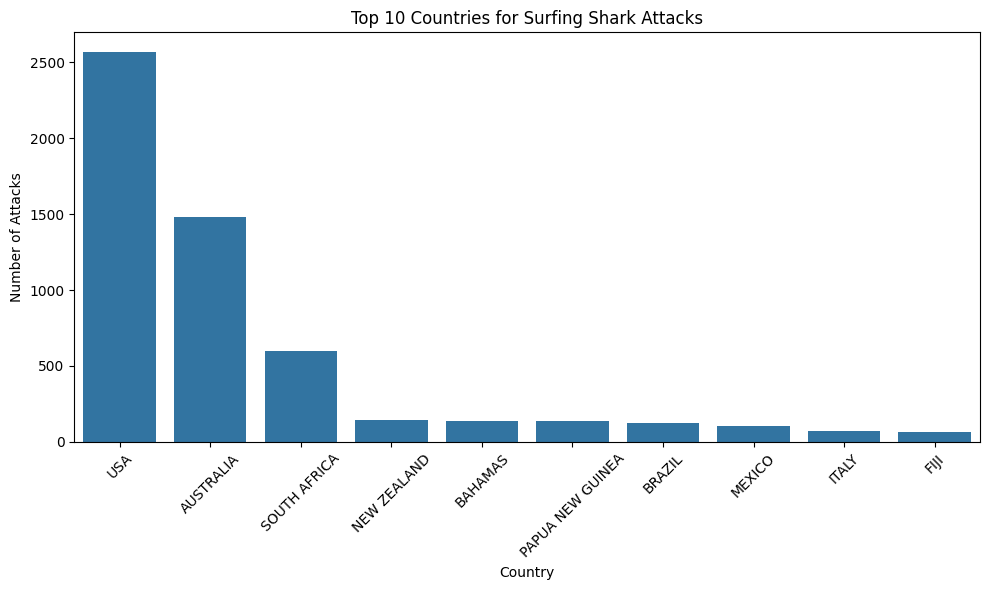

In [332]:
# --- 10 Top Countries More Surfing Attacks ---

plt.figure(figsize=(10,6))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries for Surfing Shark Attacks")
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

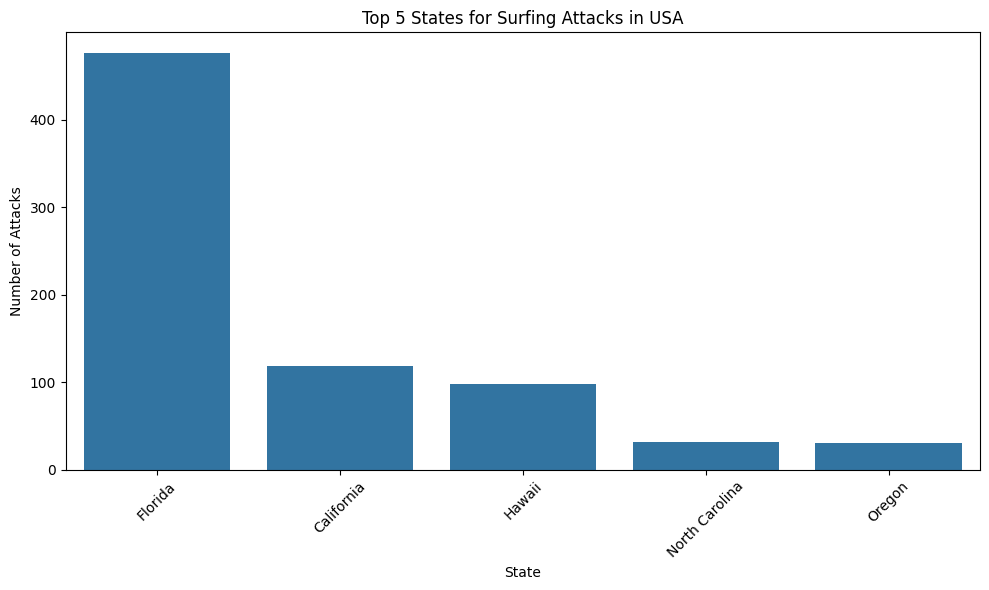

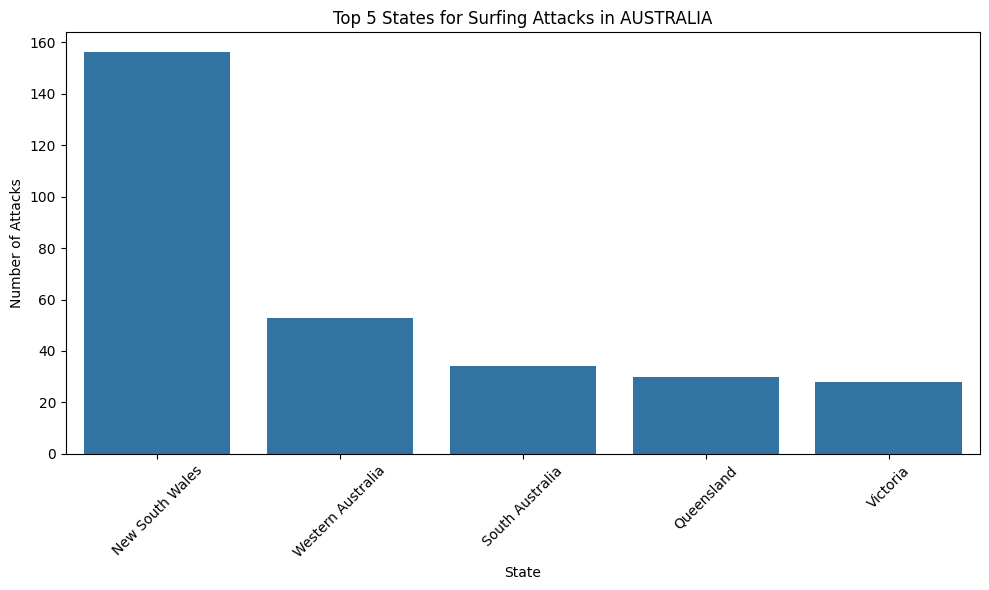

In [333]:
# --- Top states for US and Australia ---
for country in ['USA', 'AUSTRALIA']:
    plt.figure(figsize=(10,6))
    top_states = df_surf[df_surf['Country'] == country]['State'].value_counts().head(5)
    sns.barplot(x=top_states.index, y=top_states.values)
    plt.title(f"Top 5 States for Surfing Attacks in {country}")
    plt.xlabel("State")
    plt.ylabel("Number of Attacks")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

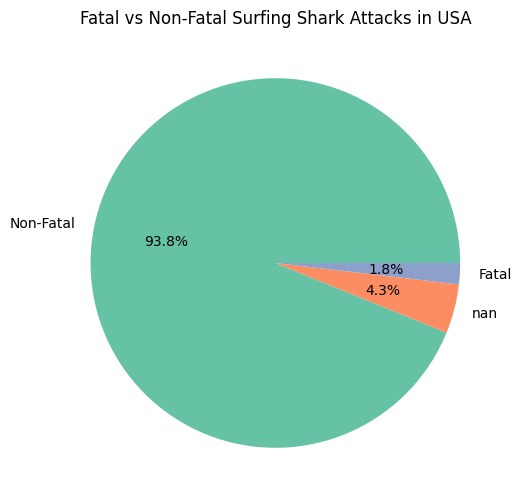

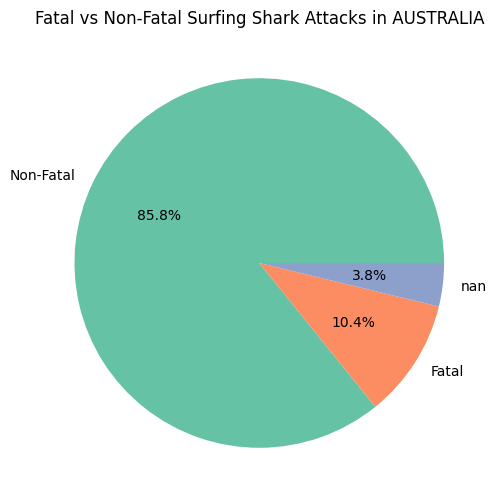

In [334]:
# --- Fatal vs Non-Fatal surfing attacks in USA and ASUTRALIA ---

for country in ['USA', 'AUSTRALIA']:
    country_surf = df_surf[df_surf['Country'] == country]
    # Get counts of fatal vs non-fatal
    fatal_counts_usa = country_surf ['Fatal_Y/N'].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(6,6))
    plt.pie(fatal_counts_usa, 
            labels=fatal_counts_usa.index.map({'N': 'Non-Fatal', 'Y': 'Fatal'}),
            autopct='%1.1f%%', 
            colors=sns.color_palette('Set2'))
    plt.title(f'Fatal vs Non-Fatal Surfing Shark Attacks in {country}')
    plt.show()

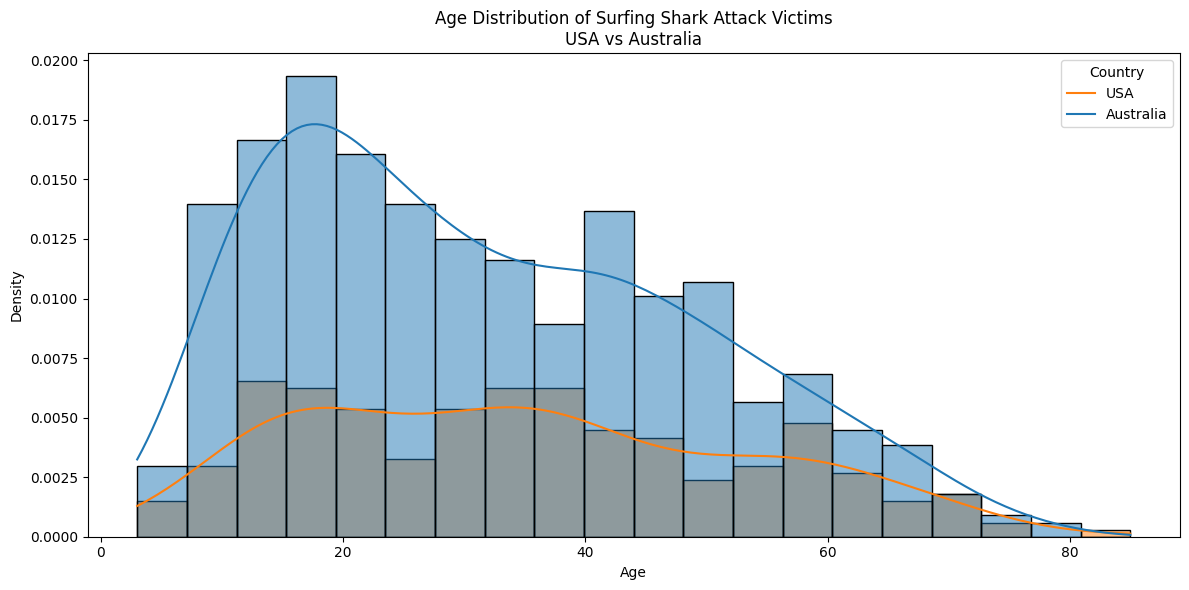

USA - Mean Age: 31.853492333901194 Std Dev: 16.998564501765287
Australia - Mean Age: 35.09442060085837 Std Dev: 17.910929377056863


In [335]:
# --- Distribution and Deviation (standard deviation) of age victims in both the USA and Australia  ---

# Ensure Age column is numeric and drop NaNs
df_surf['Age'] = pd.to_numeric(df_surf['Age'], errors='coerce')

# Filter for USA and Australia only, drop missing ages
df_usa = df_surf[(df_surf['Country'] == 'USA') & (df_surf['Age'].notnull())].copy()
df_aus = df_surf[(df_surf['Country'] == 'AUSTRALIA') & (df_surf['Age'].notnull())].copy()

# Prepare data for plotting
df_usa.loc[:, 'Country'] = 'USA'
df_aus.loc[:, 'Country'] = 'Australia'
df_age = pd.concat([df_usa[['Age','Country']], df_aus[['Age','Country']]])

# Plot distribution and standard deviation
plt.figure(figsize=(12,6))
sns.histplot(data=df_age, x='Age', hue='Country', bins=20, stat='density', kde=True, alpha=0.5)
plt.title('Age Distribution of Surfing Shark Attack Victims\nUSA vs Australia')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Country', labels=['USA', 'Australia'])
plt.tight_layout()
plt.show()

# Print basic stats for context
print("USA - Mean Age:", df_usa['Age'].mean(), "Std Dev:", df_usa['Age'].std())
print("Australia - Mean Age:", df_aus['Age'].mean(), "Std Dev:", df_aus['Age'].std())

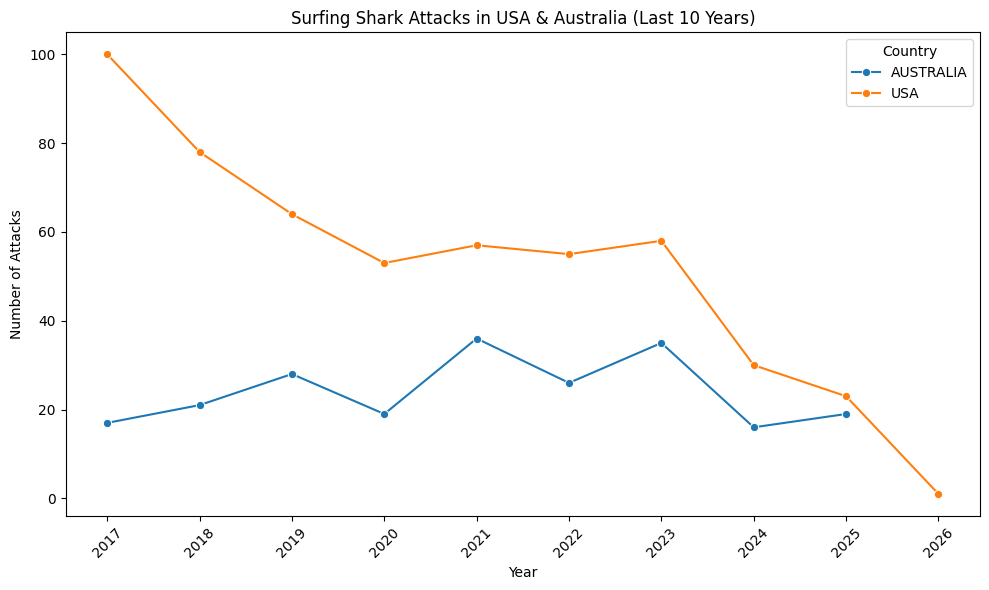

In [336]:
# --- Trend of surfing shark attacks in the last 10 years in USA and AUSTRALIA ---

# Filter for USA and Australia attacks
recent_years = sorted(df_surf['Year'].dropna().unique())[-10:]  # get last 10 years
df_recent = df_surf[df_surf['Year'].isin(recent_years) & df_surf['Country'].isin(['USA', 'AUSTRALIA'])]

# Group by year and country
trend_df = df_recent.groupby(['Year', 'Country']).size().reset_index(name='Attacks')

plt.figure(figsize=(10,6))
sns.lineplot(data=trend_df, x='Year', y='Attacks', hue='Country', marker='o')
plt.title('Surfing Shark Attacks in USA & Australia (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(recent_years, rotation=45)
plt.tight_layout()
plt.show()

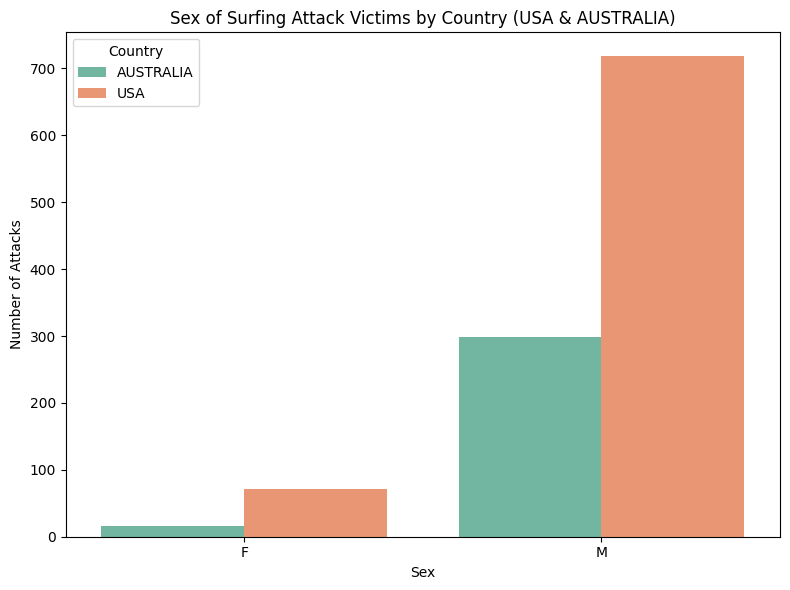

In [337]:
# Filter only USA and AUSTRALIA
df_grouped = df_surf[df_surf['Country'].isin(['USA', 'AUSTRALIA'])]

# Group by Country and Sex, count number of attacks
sex_country_counts = df_grouped.groupby(['Country', 'Sex']).size().reset_index(name='AttackCount')

# Draw grouped barplot
plt.figure(figsize=(8,6))
sns.barplot(data=sex_country_counts, x='Sex', y='AttackCount', hue='Country', palette="Set2")
plt.title("Sex of Surfing Attack Victims by Country (USA & AUSTRALIA)")
plt.xlabel("Sex")
plt.ylabel("Number of Attacks")
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [340]:
df_grouped = df_surf[df_surf['Country'].isin(['USA', 'AUSTRALIA'])]

# Group by Country and Sex, count number of attacks
sex_country_counts = df_grouped.groupby(['Country', 'Sex']).size().reset_index(name='AttackCount')
sex_country_counts

,Country,Sex,AttackCount
0,AUSTRALIA,F,16
1,AUSTRALIA,M,298
2,USA,F,72
3,USA,M,718


In [358]:
def surfing_risk_score(country, state, age, sex):
    score = 0
    if country.upper() in ['USA', 'AUSTRALIA']:
        score += 2
    if state.title() in ['Florida', 'Nsw']:
        score += 2
    if sex == 'M':
        score += 1
    if age and 15 <= age <= 40:
        score += 1
    return score